In [1]:
#import the libaries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

#set some options of pd 
pd.options.display.max_columns = 500     #toshow all the columns
pd.options.display.max_rows = 500     #toshow all the rows
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # to round


In [2]:
#import the data 
data = pd.read_csv('turnover.csv')
#data['id']=data.index

In [3]:
#check the shape 10 features and 14999 rows
print("the shape of train is :",data.shape)

the shape of train is : (14999, 10)


In [4]:
#print the columns of the columns
print("the columns of the training are :",data.columns)

the columns of the training are : Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')


In [5]:
print(data.head())

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0         0.380       0.530                   2                   157   
1         0.800       0.860                   5                   262   
2         0.110       0.880                   7                   272   
3         0.720       0.870                   5                   223   
4         0.370       0.520                   2                   159   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
3                   5              0      1          0      sales     low  
4                   3              0      1          0      sales     low  


In [6]:
#so we have 10 features:
#evaluation 0-1
#num_of_project 
#houres >> avg
#time spend >> years
#salary >> low/medium/high
#work accendient >>
#promoution
# department

In [7]:
#start preparing for data cleaning 
#1-check for dublicates 
#idsUnique = len(set(data.id))
#idsTotal = data.shape[0]
#idsDupli = idsTotal - idsUnique
#print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [9]:
# we have only 2 catorical values
#we have 10 unique  departments / 3 salary

#dep=data.department.unique()
#print(len(dep))
#print(dep)
#print(data.department.value_counts())
#print(data.salary.unique())

In [10]:
#dived the data to numerical and catograical variables 
numerical = data.dtypes[data.dtypes != object].index.tolist()
catagorical = data.dtypes[data.dtypes == object].index.tolist()
print("Numerical : \n" + str(numerical) + "\n")
print("catagorical: " + str(catagorical))

Numerical : 
['satisfaction', 'evaluation', 'number_of_projects', 'average_montly_hours', 'time_spend_company', 'work_accident', 'churn', 'promotion']

catagorical: ['department', 'salary']


In [11]:
data[numerical].describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


In [12]:
#evaluation 0-1 ---> 0.36 -1 >>> the mean is over 0.7 so the over all is good
#satisfaction 0-1 --->0.09 - 1
#number_of_projects 2-7
#average_montly_hours >> min 96 week=40 * 4  = 160 fulltime
#max 310 -160 = 150 hours overtime
#mean 201 - 160 = 41 overtime 
print(data.average_montly_hours.var())
# the variance for hourse is very high
# so we can ask which department have the highest average_montly_hours
# time_spend_company --> 2-10 years  and the nean is 3.4 so we can ask age of the department
#work_accident -> 0 or one so we can make this 0/1 True or false 
print(data.work_accident.unique()) # check the avage of the accendient and in which department and tie this with the average_montly_hours,
#time_spend_company
print(data.churn.unique())  #leave or stay and this this the targert value
#promotion 
print(data.promotion.unique())
#convert ask about why the company promote the employee evaluation/time_spend_company/department
#see the promoted with leave or stay 
# ask aout the department and salary /time_spend_company/

2494.313174809979
[0 1]
[1 0]
[0 1]


In [13]:
#convert any infinty value to nan
data = data.replace([np.inf, -np.inf], np.nan)
print(data.info())
# there is no missing data in this data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


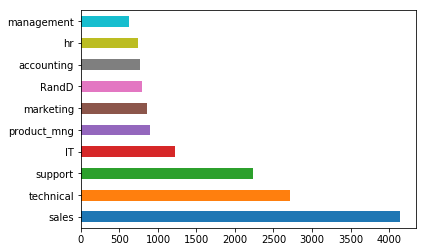

In [14]:
#start answer the questions that we constructed earier
#1-which department has the highest houres
df=data.department.value_counts()
print(df)
df.plot(kind='barh')
#sales is the highest and 

In [15]:
data.groupby('department').average_montly_hours.mean().sort_values()
#the avarage is very close but on the other side the empoloyes is 

department
hr            198.685
marketing     199.386
product_mng   199.966
support       200.758
RandD         200.801
sales         200.911
accounting    201.163
management    201.249
IT            202.216
technical     202.497
Name: average_montly_hours, dtype: float64

In [16]:
data.groupby('department').promotion.sum().sort_values()
#the most promotion is in sales

department
product_mng      0
IT               3
accounting      14
hr              15
support         20
RandD           27
technical       28
marketing       43
management      69
sales          100
Name: promotion, dtype: int64

In [17]:
#the totale number of accendents is 2169 and the avarge is 0.14
accendent = data.work_accident.sum()
print(accendent)
print(accendent/ data.work_accident.count())

data.groupby('department').work_accident.sum().sort_values()
#the most accendent is in sales /


2169
0.1446096406427095


department
hr              89
accounting      96
management     103
product_mng    132
RandD          134
marketing      138
IT             164
support        345
technical      381
sales          587
Name: work_accident, dtype: int64

In [18]:
data.groupby('department').churn.sum().sort_values()
#the most chturn is in the sales, techniqual and the sorrat almost the same as the accendent 

department
management       91
RandD           121
product_mng     198
marketing       203
accounting      204
hr              215
IT              273
support         555
technical       697
sales          1014
Name: churn, dtype: int64

In [19]:
table=pd.crosstab(data.department,data.salary)
cc=data.department.value_counts()

print(cc)
table2=table.join(cc)
print(table2)
s = [] 
for i in data.salary.unique():
    table2[i]=table2[i] / table2.department
    
print(table2)
highest = table2['low'].sort_values(ascending=True)
print(highest)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
             high   low  medium  department
department                                 
IT             83   609     535        1227
RandD          51   364     372         787
accounting     74   358     335         767
hr             45   335     359         739
management    225   180     225         630
marketing      80   402     376         858
product_mng    68   451     383         902
sales         269  2099    1772        4140
support       141  1146     942        2229
technical     201  1372    1147        2720
             high   low  medium  department
department                                 
IT          0.068 0.496   0.436        1227
RandD       0.065 0.463   0.473         787
accounting  0.096 0.467   0.437         767
hr          0.061 0.4

In [20]:
# so over than 60% quit and has a law salary
highest=data[data.salary == 'low'].churn.sum() / data.churn.sum() *100
highest2=data[data.salary == 'medium'].churn.sum() / data.churn.sum() *100
highest3=data[data.salary == 'high'].churn.sum() / data.churn.sum() *100
print(highest)
print(highest2)
print(highest3)
print(highest + highest2 +highest3)

60.82329879585551
36.88042565107813
2.2962755530663683
100.0


Index([0, 1, 'department'], dtype='object')
                0     1  department  persentage
department                                     
IT            954   273        1227       0.222
RandD         666   121         787       0.154
accounting    563   204         767       0.266
hr            524   215         739       0.291
management    539    91         630       0.144
marketing     655   203         858       0.237
product_mng   704   198         902       0.220
sales        3126  1014        4140       0.245
support      1674   555        2229       0.249
technical    2023   697        2720       0.256
                0     1  department  persentage
department                                     
hr            524   215         739       0.291
accounting    563   204         767       0.266
technical    2023   697        2720       0.256
support      1674   555        2229       0.249
sales        3126  1014        4140       0.245
marketing     655   203         858       0.

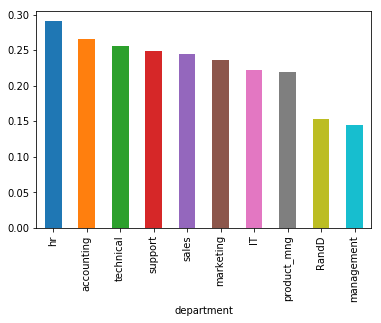

In [21]:
table3=pd.crosstab(data.department,data.churn)
table4 =table3.join(cc)
print(table4.columns)
table4['persentage'] = table4[1] / table4['department']
print(table4)
table4= table4.sort_values('persentage',ascending=False)
print(table4)

table4.persentage.plot(kind='bar')

In [22]:
#start preprocessing for the model 
#leave the true/ false as it is 0 or 1 
#so regardress to that we have 2 catagorical 
#salary --> small set and ordered --> so we can use cat 
#department --> large set and unordered --> so we can use dummies

In [23]:
#start looking if there is something have to normiled
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
numerical = ['satisfaction','evaluation','number_of_projects','average_montly_hours','time_spend_company']
others   = ['work_accident', 'churn','promotion', 'department', 'salary']
data2 = pd.DataFrame(scale.fit_transform(data[numerical]),columns=numerical)
data3 = data[others]
all_data = pd.concat([data2,data3],axis=1)
# average_montly_hours is by far higher than the others
#np.log(data[['average_montly_hours','number_of_projects','time_spend_company']])
#data2[others] = others
#data['department'] = department 
#data['salary']     = salary
print(all_data.head())
all_data.var()

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0        -0.936      -1.087              -1.463                -0.882   
1         0.753       0.841               0.971                 1.220   
2        -2.022       0.958               2.594                 1.421   
3         0.431       0.899               0.971                 0.440   
4        -0.977      -1.146              -1.463                -0.842   

   time_spend_company  work_accident  churn  promotion department  salary  
0              -0.341              0      1          0      sales     low  
1               1.713              0      1          0      sales  medium  
2               0.344              0      1          0      sales  medium  
3               1.029              0      1          0      sales     low  
4              -0.341              0      1          0      sales     low  


satisfaction           1.000
evaluation             1.000
number_of_projects     1.000
average_montly_hours   1.000
time_spend_company     1.000
work_accident          0.124
churn                  0.181
promotion              0.021
dtype: float64

In [24]:
all_data.salary = all_data.salary.astype('category')
all_data.salary = all_data.salary.cat.reorder_categories(['low','medium','high'])
all_data.salary = all_data.salary.cat.codes


In [25]:
departments = pd.get_dummies(all_data.department)
departments = departments.drop('technical',axis=1)
all_data = all_data.drop('department',axis=1)
all_data = all_data.join(departments)

In [26]:
print(departments.head())

   IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   
2   0      0           0   0           0          0            0      1   
3   0      0           0   0           0          0            0      1   
4   0      0           0   0           0          0            0      1   

   support  
0        0  
1        0  
2        0  
3        0  
4        0  


In [27]:
# start looking at the target value
n = len(all_data)
d = all_data.churn.value_counts()
print(d)
# presentage of staying and left employees 
per = (d/n) * 100
print(per)
#so stayed --> 76.19
#left --> 23.808 

0    11428
1     3571
Name: churn, dtype: int64
0   76.192
1   23.808
Name: churn, dtype: float64


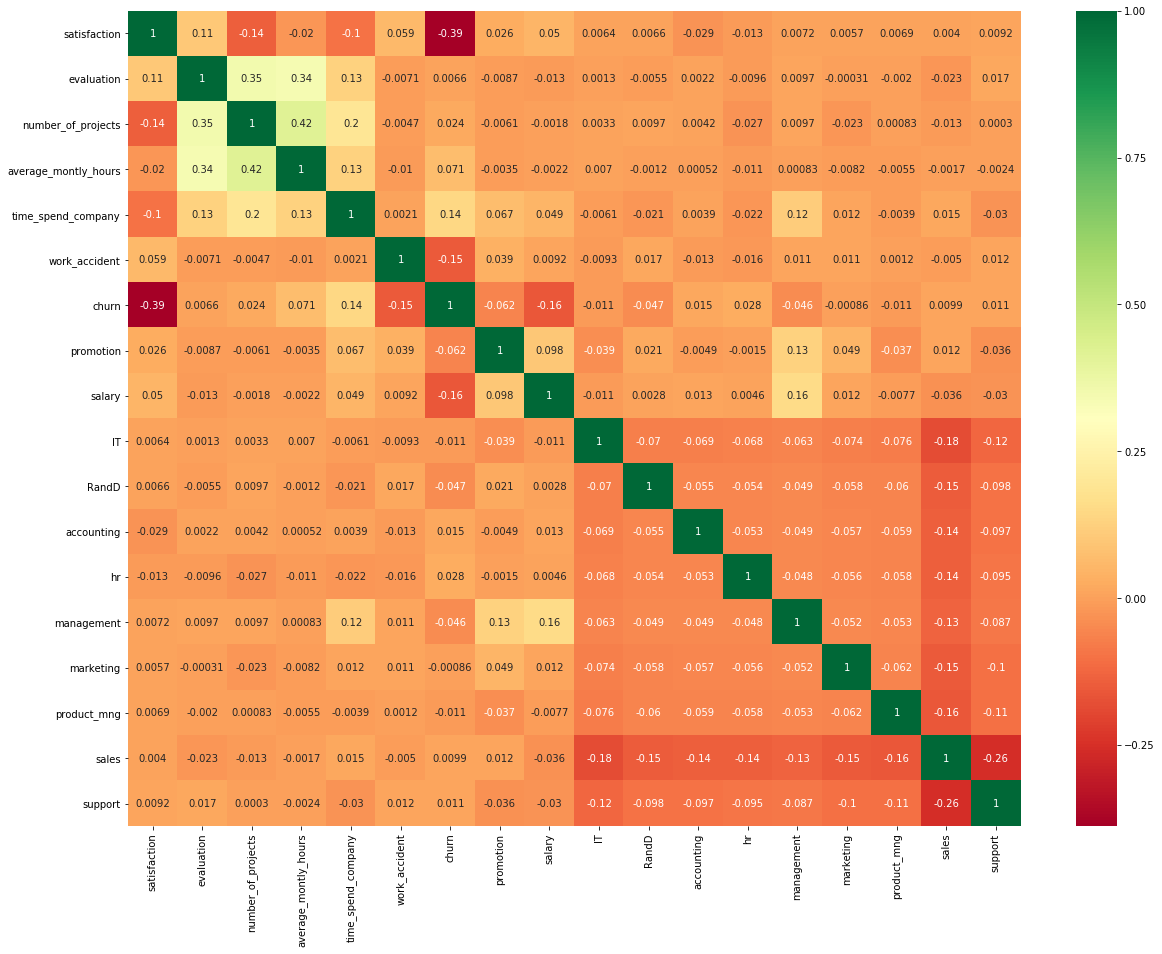

In [28]:
# start check for the corrlation
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(20,15))
matrix = all_data.corr()
sns.heatmap(matrix,annot=True,cmap="RdYlGn")
plt.show()
#churn --> is high with satisfication so low satisfication mean high chance to churn

In [29]:
y = all_data.churn
X = all_data.drop('churn',axis=1)
print(y.head())
print(X.head())

0    1
1    1
2    1
3    1
4    1
Name: churn, dtype: int64
   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0        -0.936      -1.087              -1.463                -0.882   
1         0.753       0.841               0.971                 1.220   
2        -2.022       0.958               2.594                 1.421   
3         0.431       0.899               0.971                 0.440   
4        -0.977      -1.146              -1.463                -0.842   

   time_spend_company  work_accident  promotion  salary  IT  RandD  \
0              -0.341              0          0       0   0      0   
1               1.713              0          0       1   0      0   
2               0.344              0          0       1   0      0   
3               1.029              0          0       0   0      0   
4              -0.341              0          0       0   0      0   

   accounting  hr  management  marketing  product_mng  sales  support  
0      

In [30]:
from sklearn.model_selection import train_test_split
y_train,y_test,X_train,X_test = train_test_split(y,X,test_size=0.3,random_state = 42)

In [31]:
# start with avery simple 
#from the first DT we can see there is an overfitting  
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42,max_depth=50)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [32]:
model.score(X_train,y_train) * 100


100.0

In [33]:
model.score(X_test,y_test) * 100

97.6

In [34]:
from sklearn.metrics import precision_score,roc_auc_score
from sklearn.metrics import confusion_matrix
# Predict whether employees will churn using the test set
prediction = model.predict(X_test)

# Calculate precision score by comparing target_test with the prediction
score =precision_score(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
Cm  = confusion_matrix(y_test, prediction)
print (score,auc)
print(Cm)

0.9405850091407678 0.9704632830596144
[[3363   65]
 [  43 1029]]


In [35]:
#start tuning the first model
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,X_train,y_train,cv=10))

[0.97714286 0.97904762 0.97619048 0.98190476 0.97047619 0.97333333
 0.97428571 0.98       0.98285714 0.98570067]


In [36]:
# Generate values for maximum depth
depth = [i for i in range(5,100,2)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,150)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [37]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

depth = [50,5,100]
samples =[5,50,500]
# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
#verbose=10 --> showing the progress of the cv
param_search = GridSearchCV(model, parameters,cv=10, scoring='accuracy', verbose=10)

# fit the param_search to dataset
param_search.fit(X_train,y_train)

# print the best parameters found


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] max_depth=50, min_samples_leaf=5 ................................
[CV]  max_depth=50, min_samples_leaf=5, score=0.981904761904762, total=   0.0s
[CV] max_depth=50, min_samples_leaf=5 ................................
[CV]  max_depth=50, min_samples_leaf=5, score=0.9742857142857143, total=   0.0s
[CV] max_depth=50, min_samples_leaf=5 ................................
[CV]  max_depth=50, min_samples_leaf=5, score=0.9761904761904762, total=   0.0s
[CV] max_depth=50, min_samples_leaf=5 ................................
[CV]  max_depth=50, min_samples_leaf=5, score=0.979047619047619, total=   0.0s
[CV] max_depth=50, min_samples_leaf=5 ................................
[CV]  max_depth=50, min_samples_leaf=5, score=0.9771428571428571, total=   0.0s
[CV] max_depth=50, min_samples_leaf=5 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=50, min_samples_leaf=5, score=0.9771428571428571, total=   0.0s
[CV] max_depth=50, min_samples_leaf=5 ................................
[CV]  max_depth=50, min_samples_leaf=5, score=0.9723809523809523, total=   0.0s
[CV] max_depth=50, min_samples_leaf=5 ................................
[CV]  max_depth=50, min_samples_leaf=5, score=0.9752380952380952, total=   0.0s
[CV] max_depth=50, min_samples_leaf=5 ................................
[CV]  max_depth=50, min_samples_leaf=5, score=0.979047619047619, total=   0.0s
[CV] max_depth=50, min_samples_leaf=5 ................................
[CV]  max_depth=50, min_samples_leaf=5, score=0.9733079122974261, total=   0.0s
[CV] max_depth=50, min_samples_leaf=50 ...............................
[CV]  max_depth=50, min_samples_leaf=50, score=0.9733333333333334, total=   0.0s
[CV] max_depth=50, min_samples_leaf=50 ...............................
[CV]  max_depth=50, min_samples_leaf=50, score=0.9628571428571429, total=   0.0s
[CV] max_dept

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=50, min_samples_leaf=50, score=0.9742857142857143, total=   0.0s
[CV] max_depth=50, min_samples_leaf=50 ...............................
[CV]  max_depth=50, min_samples_leaf=50, score=0.9619047619047619, total=   0.0s
[CV] max_depth=50, min_samples_leaf=50 ...............................
[CV]  max_depth=50, min_samples_leaf=50, score=0.9704761904761905, total=   0.0s
[CV] max_depth=50, min_samples_leaf=50 ...............................
[CV]  max_depth=50, min_samples_leaf=50, score=0.9685714285714285, total=   0.0s
[CV] max_depth=50, min_samples_leaf=50 ...............................
[CV]  max_depth=50, min_samples_leaf=50, score=0.9714285714285714, total=   0.0s
[CV] max_depth=50, min_samples_leaf=50 ...............................
[CV]  max_depth=50, min_samples_leaf=50, score=0.9752380952380952, total=   0.0s
[CV] max_depth=50, min_samples_leaf=50 ...............................
[CV]  max_depth=50, min_samples_leaf=50, score=0.9647283126787417, total=   0.0s
[CV] ma

[CV]  max_depth=100, min_samples_leaf=50, score=0.9733333333333334, total=   0.0s
[CV] max_depth=100, min_samples_leaf=50 ..............................
[CV]  max_depth=100, min_samples_leaf=50, score=0.9628571428571429, total=   0.0s
[CV] max_depth=100, min_samples_leaf=50 ..............................
[CV]  max_depth=100, min_samples_leaf=50, score=0.9647619047619047, total=   0.0s
[CV] max_depth=100, min_samples_leaf=50 ..............................
[CV]  max_depth=100, min_samples_leaf=50, score=0.9742857142857143, total=   0.0s
[CV] max_depth=100, min_samples_leaf=50 ..............................
[CV]  max_depth=100, min_samples_leaf=50, score=0.9619047619047619, total=   0.0s
[CV] max_depth=100, min_samples_leaf=50 ..............................
[CV]  max_depth=100, min_samples_leaf=50, score=0.9704761904761905, total=   0.0s
[CV] max_depth=100, min_samples_leaf=50 ..............................
[CV]  max_depth=100, min_samples_leaf=50, score=0.9685714285714285, total=   0.0s


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.9s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [50, 5, 100], 'min_samples_leaf': [5, 50, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [38]:
print(param_search.best_params_) 

{'max_depth': 50, 'min_samples_leaf': 5}


In [39]:
model = DecisionTreeClassifier(random_state=42,max_depth=7,min_samples_leaf=50)
model.fit(X_train,y_train)
# Calculate feature importances
feature_importances = model.feature_importances_


# Create a list of features: done
feature_list = list(X_train)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort the DataFrame to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.568
evaluation,0.145
time_spend_company,0.137
number_of_projects,0.094
average_montly_hours,0.056
hr,0.000
sales,0.000
product_mng,0.000
marketing,0.000
management,0.000


In [40]:
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = X_train[selected_list]
features_test_selected = X_test[selected_list]

In [41]:

from sklearn.metrics import recall_score
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth = 7,min_samples_leaf = 50,class_weight = "balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, y_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, y_test) * 100)

# Print the recall score of the model predictions
print(recall_score(y_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(y_test, prediction_best) * 100)

96.66666666666667
89.08582089552239
94.06158022605757


In [42]:
#start ensampling model 
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
seed = 42
y_train,y_test,X_train,X_test = train_test_split(y,X,test_size=0.3,random_state = seed)
lr = LogisticRegression(random_state =seed)
dt = DecisionTreeClassifier(random_state=seed,max_depth=50)
knn =Knn()
classifiers = [('lr',lr),('Dt',dt),('knn',knn)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train,y_train)
pre = vc.predict(X_test)
# Print the general accuracy of the model_best
print(accuracy_score(y_test,pre) * 100)

# Print the recall score of the model predictions
print(recall_score(y_test, pre) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(y_test, pre) * 100)

C:\Users\arsany\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


96.91111111111111
91.69776119402985
95.11959238231248


C:\Users\arsany\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:
# start ensample learning techniques 
#1-try voting clasifier
#from sklearn.ensemble import RandomForestClassifier

# Generate values for maximum depth
#depth = [i for i in range(4,10,1)]

# Generate values for minimum sample size
#samples = [i for i in range(50,500,50)]

#nstematories
#estimators = [50,100,500]
#min_leaf = [0.012,0.13,0.06,0.03]

# Create the dictionary with parameters to be checked
#parameters = dict(n_estimators=estimators,max_depth=depth,min_samples_leaf=min_leaf)


#rand =RandomForestClassifier(random_state=seed,max_features=10)
#param_search = GridSearchCV(rand, parameters,cv=10)
#param_search.fit(X_train,y_train)

# print the best parameters found
#print(param_search.best_params_)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y_train,y_test,X_train,X_test = train_test_split(y,X,test_size=0.3,random_state = seed)

print(y_test.head())


rand =RandomForestClassifier(max_depth=6, min_samples_leaf=0.012,n_estimators=500, random_state=seed,max_features= 10)
rand.fit(X_train,y_train),
pre = rand.predict(X_test)
# Print the general accuracy of the model_best
print(accuracy_score(y_test,pre) * 100)

# Print the recall score of the model predictions
print(recall_score(y_test, pre) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(y_test, pre) * 100)

6723    0
6473    0
4679    0
862     1
7286    0
Name: churn, dtype: int64
95.97777777777777
89.8320895522388
93.86586974694787


In [45]:
from xgboost import XGBClassifier

depth = [i for i in range(5,100,2)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

#nstematories
estimators = [50,100,500]

learning = [0.001,0.01,0.1]
fraetues   = [5,3,10]
# Create the dictionary with parameters to be checked
parameters = dict(n_estimators=estimators)
m1 = XGBClassifier(learning_rate=0.01,max_depth=6,min_samples_leaf=0.012,n_estimators=500, random_state=seed,max_features= 10)
m1.fit(X_train,y_train)

# print the best parameters found





XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=6, max_features=10, min_child_weight=1,
       min_samples_leaf=0.012, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [46]:
pre =m1.predict(X_test)
# Print the general accuracy of the model_best
print(accuracy_score(y_test,pre) * 100)

# Print the recall score of the model predictions
print(recall_score(y_test, pre) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(y_test, pre) * 100)

97.55555555555556
90.95149253731343
95.28613133283407


C:\Users\arsany\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
#import the libaries  
import numpy as np
print(data.head())

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0         0.380       0.530                   2                   157   
1         0.800       0.860                   5                   262   
2         0.110       0.880                   7                   272   
3         0.720       0.870                   5                   223   
4         0.370       0.520                   2                   159   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
3                   5              0      1          0      sales     low  
4                   3              0      1          0      sales     low  


In [69]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras import optimizers

predictors = all_data.drop(['churn'],axis=1)
target = to_categorical(y_train)
y_test = to_categorical(y_test)
n_cols = X_train.shape[1]
def get_best():
    model = Sequential()
    model.add(Dense(10,activation='relu',kernel_initializer='random_normal',input_shape=(n_cols,)))
    model.add(Dense(4,activation='relu',kernel_initializer='random_normal'))
    model.add(Dense(7,activation='relu',kernel_initializer='random_normal'))
    model.add(Dense(2,activation='sigmoid',kernel_initializer='random_normal'))
    return(model)

In [70]:
from keras.callbacks import EarlyStopping
#lr = [0.000001,0.0001,0.01,1,10]
#for i in lr:
early_stopping_monitor =EarlyStopping(patience=0.5)
model= get_best()
  #  optimiser= optimizers.SGD(lr=i)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,target, epochs=20,validation_split=0.3,callbacks = [early_stopping_monitor])


Train on 7349 samples, validate on 3150 samples
Epoch 1/20
7349/7349 [==============================] - 1s 83us/step - loss: 0.5488 - acc: 0.7628 - val_loss: 0.4014 - val_acc: 0.7600
Epoch 2/20
7349/7349 [==============================] - 0s 31us/step - loss: 0.3526 - acc: 0.7628 - val_loss: 0.3153 - val_acc: 0.7600
Epoch 3/20
7349/7349 [==============================] - 0s 29us/step - loss: 0.2907 - acc: 0.8619 - val_loss: 0.2739 - val_acc: 0.9125
Epoch 4/20
7349/7349 [==============================] - 0s 30us/step - loss: 0.2569 - acc: 0.9327 - val_loss: 0.2489 - val_acc: 0.9376
Epoch 5/20
7349/7349 [==============================] - 0s 28us/step - loss: 0.2358 - acc: 0.9473 - val_loss: 0.2323 - val_acc: 0.9505
Epoch 6/20
7349/7349 [==============================] - 0s 29us/step - loss: 0.2203 - acc: 0.9558 - val_loss: 0.2220 - val_acc: 0.9498
Epoch 7/20
7349/7349 [==============================] - 0s 29us/step - loss: 0.2082 - acc: 0.9582 - val_loss: 0.2095 - val_acc: 0.9587
Epoch 8

In [71]:
eval_m = model.evaluate(X_train,target)
print(eval_m)

10499/10499 [==============================] - 0s 15us/step
[0.15648280210450258, 0.9599961901133441]


In [72]:
y_pre = model.predict(X_test)
y_pre =(y_pre>0.5)

In [73]:
print(accuracy_score(y_test,y_pre) * 100)

# Print the recall score of the model predictions
#print(recall_score(y_test, y_pre) * 100)

# Print the ROC/AUC score of the model predictions
#print(roc_auc_score(y_test, y_pre) * 100)

95.44444444444444


In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pre.argmax(axis=1))
print(cm)

[[3340   88]
 [ 117  955]]
